In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!apt-get install unzip
!unzip "/content/drive/MyDrive/Dataset/Gilgit_Road_images.v1i.yolov8.zip" -d /content/extract/
!ls /content/extract/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Archive:  /content/drive/MyDrive/Dataset/Gilgit_Road_images.v1i.yolov8.zip
  inflating: /content/extract/README.roboflow.txt  
  inflating: /content/extract/data.yaml  
   creating: /content/extract/test/
   creating: /content/extract/test/images/
 extracting: /content/extract/test/images/WhatsApp-Image-2024-11-01-at-23-52-43_ff4457b8_jpg.rf.2f99f3a703e1665b8b6c2a551d93a273.jpg  
 extracting: /content/extract/test/images/WhatsApp-Image-2024-11-06-at-03-38-39_11f0d2ff_jpg.rf.710bcfe55d34499cbc4e5c36213c6c9f.jpg  
 extracting: /content/extract/test/images/WhatsApp-Image-2024-11-06-at-03-38-40_78b143e0_jpg.rf.856b6614dc1c8769f3a69bffa7249be8.jpg  
 extracting: /content/extract/test/images/WhatsApp-Image-2024-11-06-at-03-38-42_77676f2c_jpg.rf.080d3b1826dbfc744eed90adaeb91e66.jp

In [5]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 27.6 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
model = YOLO('yolov8s.pt')  # Pre-trained small model


100%|██████████| 21.5M/21.5M [00:00<00:00, 207MB/s]


In [8]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/extract/data.yaml  epochs=50 batch=16 imgsz=224 lr0=0.01 lrf=0.1 patience=20 plots=True

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/extract/data.yaml, epochs=50, time=None, patience=20, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

In [9]:
!ls runs/detect/train

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				    R_curve.png       val_batch0_pred.jpg
events.out.tfevents.1731267917.cf9e10d6a9fc.3141.0  results.csv       val_batch1_labels.jpg
F1_curve.png					    results.png       val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights
labels.jpg					    train_batch1.jpg


In [10]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/extract/data.yaml

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,136,420 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/extract/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100% 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:06<00:00,  2.10s/it]
                   all         41         48      0.578      0.172      0.125     0.0781
             bulldozer          2          2          1          0          0          0
                   car          1          1          1          0    0.00246    0.00126
             landslide          1          1          1          0          0          0
        left turn road          1          1          0          0    0.00478    0.00239
             left-turn          1          1          1          0    0.00622    0.00187
             left_turn          6          6      0.085      0

In [11]:
!ls runs/detect/val

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


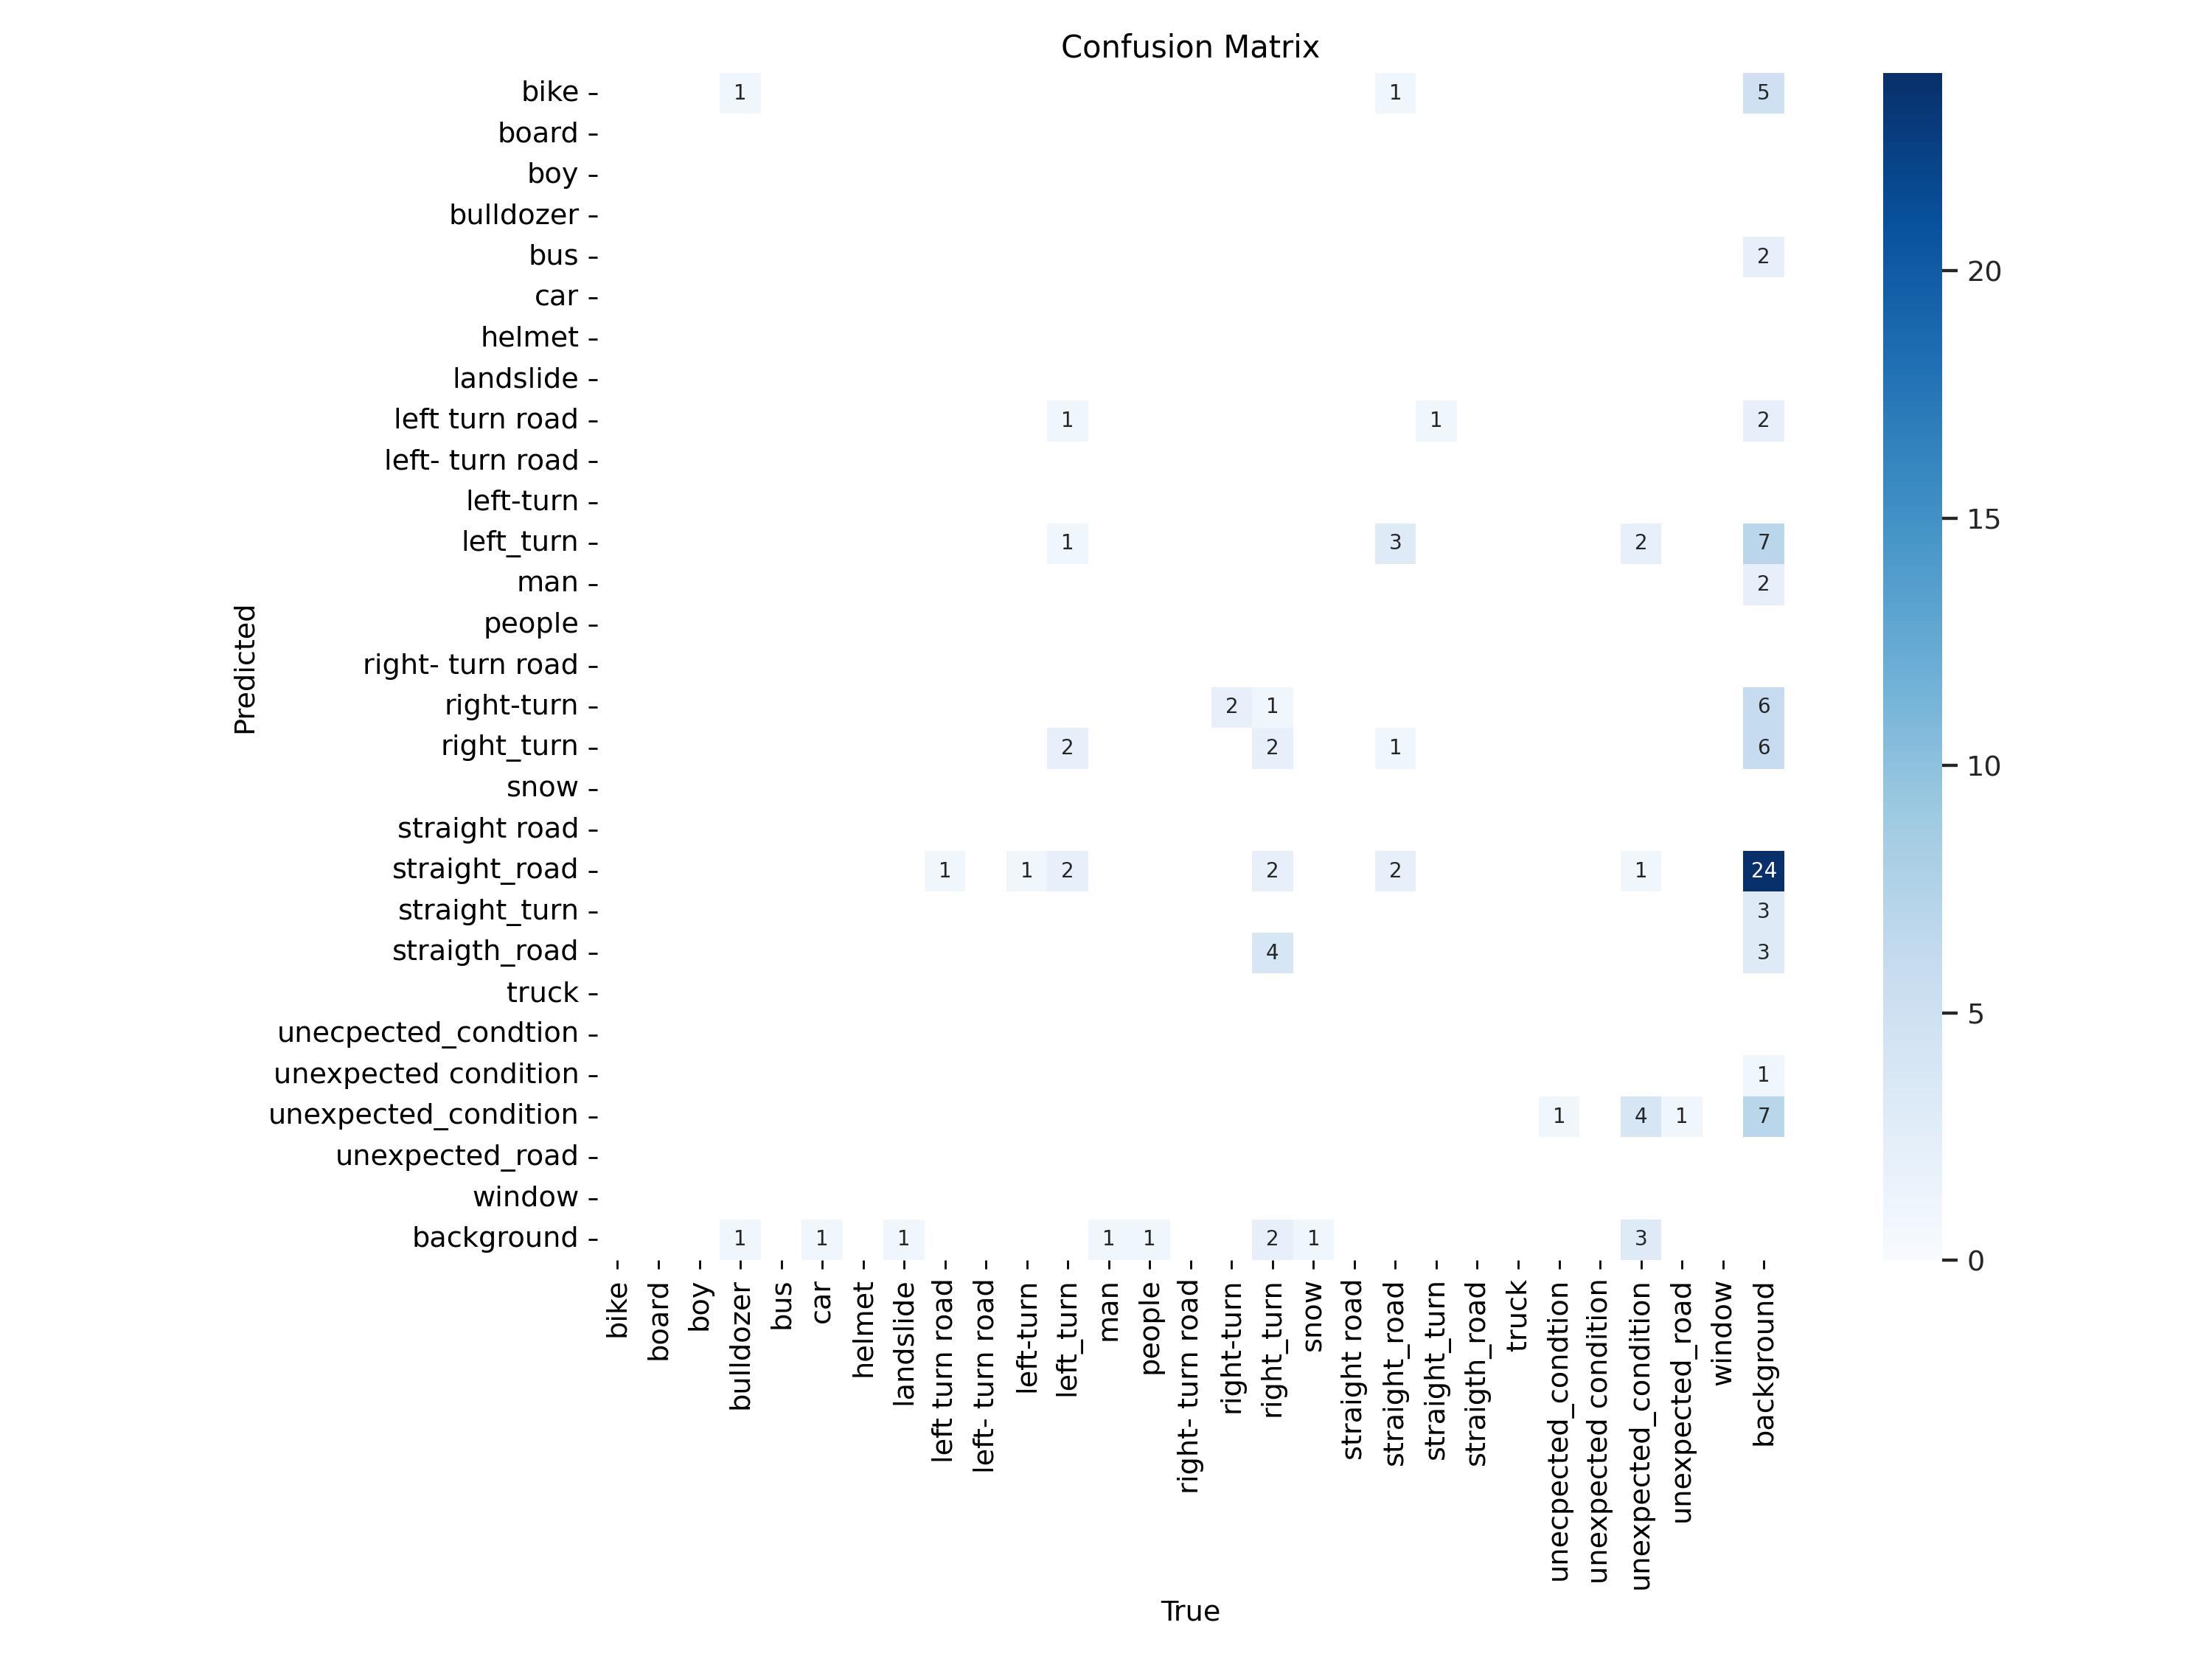

In [12]:
from IPython.display import Image, display

# Path to the confusion matrix image from the latest run
confusion_matrix_path = 'runs/detect/train/confusion_matrix.png'  # Update this path if needed

# Display the confusion matrix image
display(Image(filename=confusion_matrix_path, width=600))


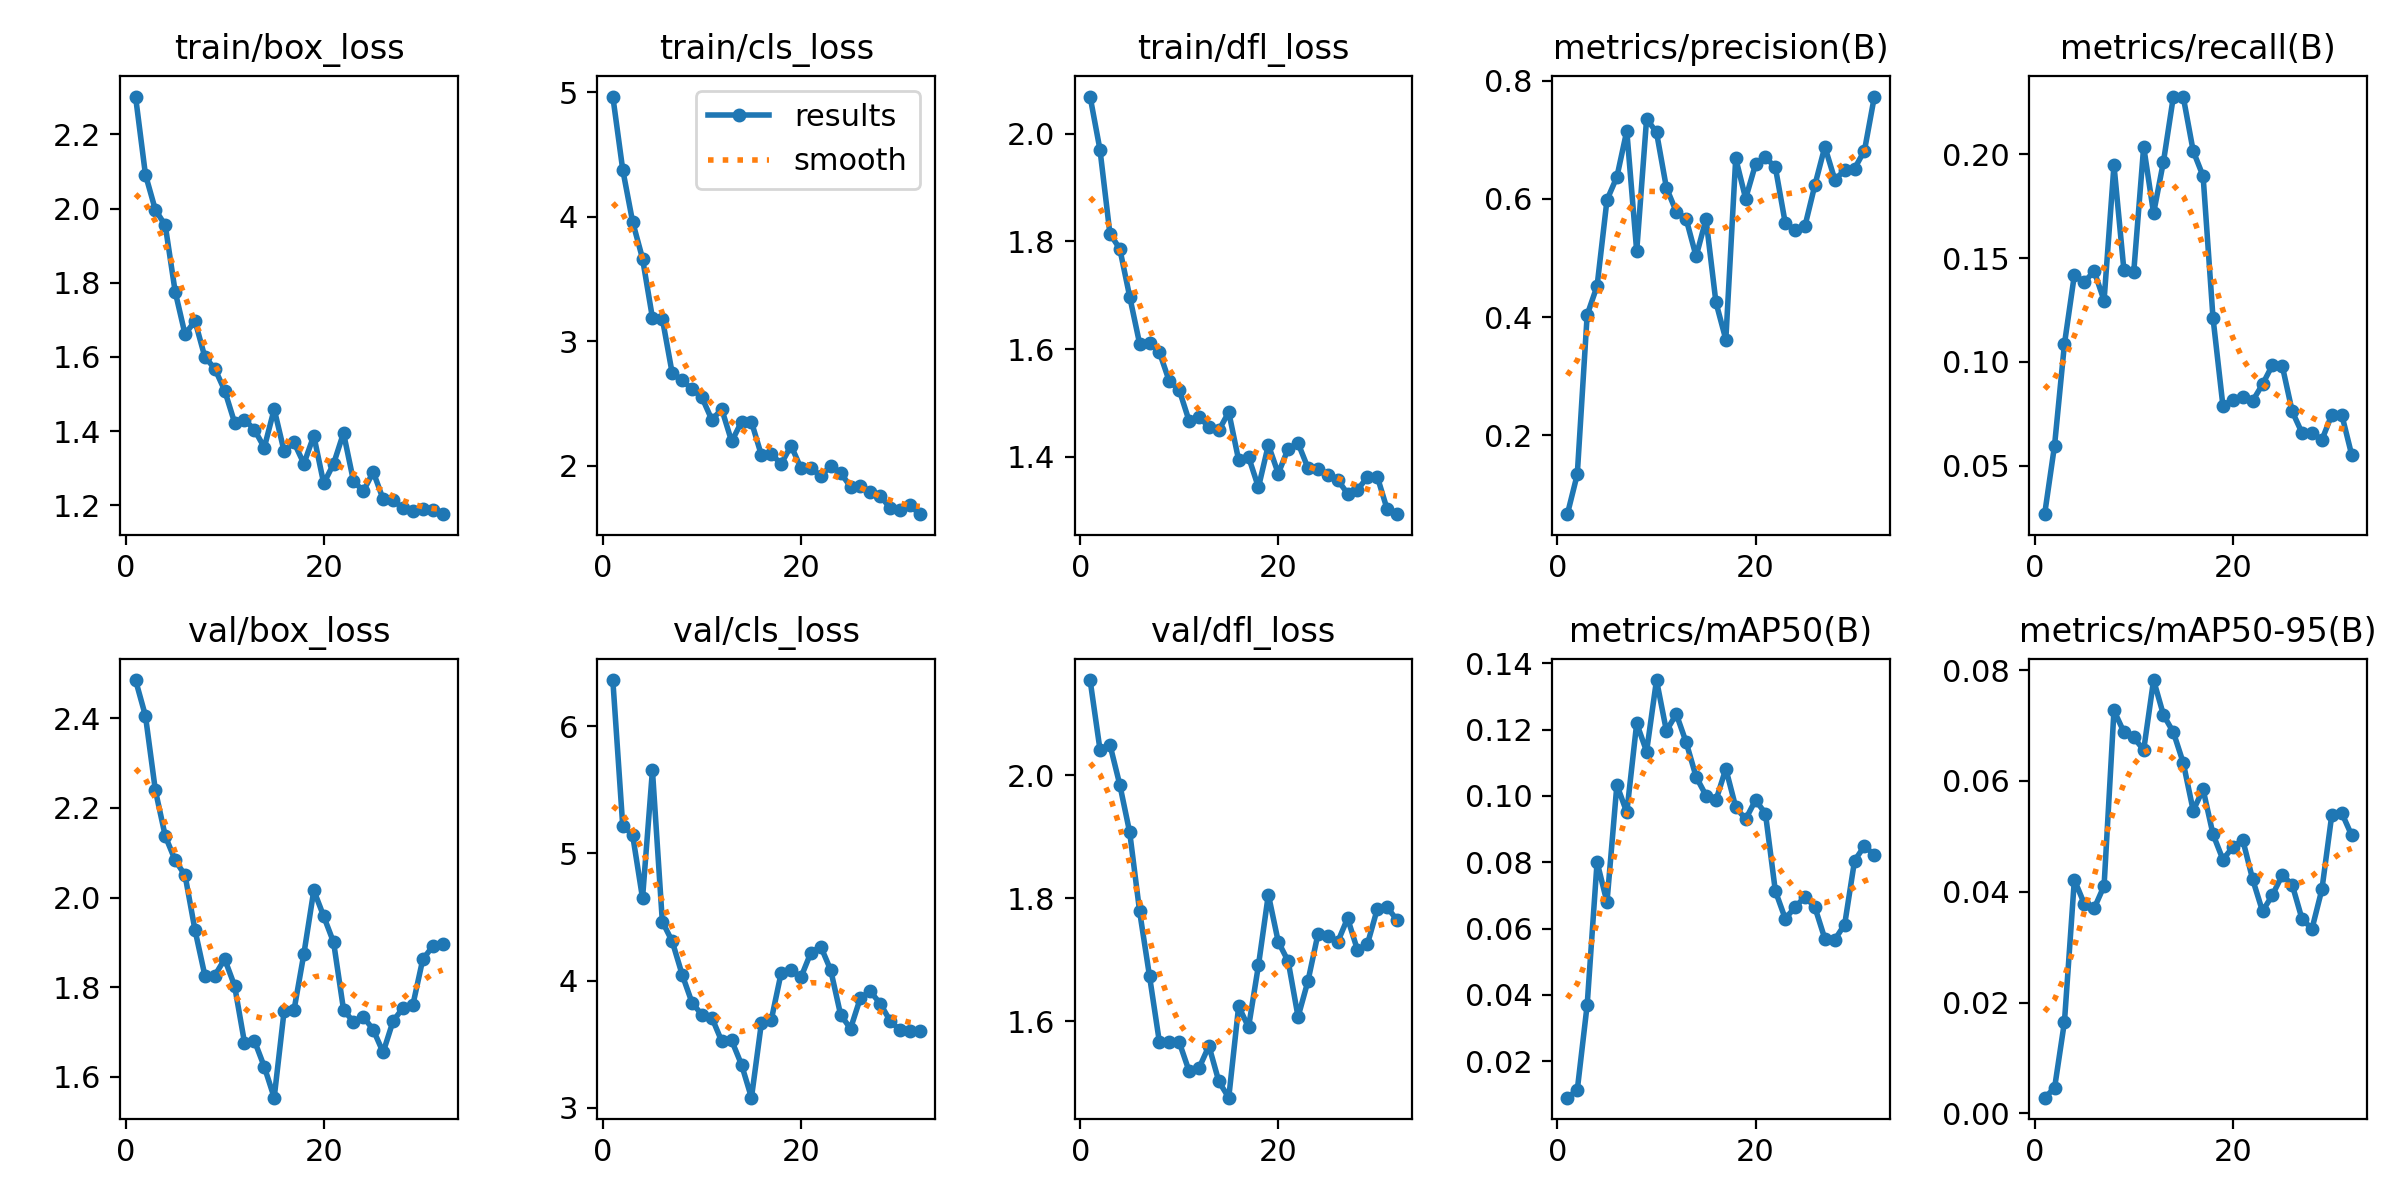

In [13]:
Image(filename='runs/detect/train/results.png', width=600)

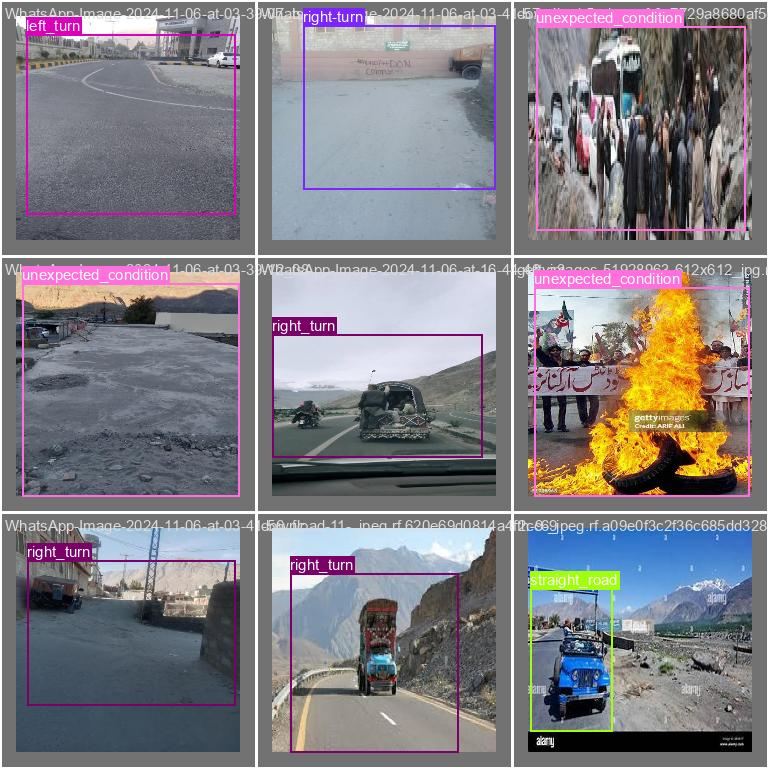

In [14]:
Image(filename='/content/runs/detect/train/val_batch1_labels.jpg', width=600)